# Import Packages

In [26]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

from anaysis.src.bivariate_analysis import BivariateAnalyzer, CategoricalVsNumericalAnalysis

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

# Loading data

In [9]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
data = pd.concat([train_data, test_data], sort=False)

# Exploratory Data Analysis
## Date Ranges

In [4]:
print(f"Min Date: {data['date'].min()}")
print(f"Max Date: {data['date'].max()}")

Min Date: 2013-01-01
Max Date: 2018-03-31


#### Key Observations
- The data spans from January 1, 2013 to March 31, 2018.
- The range covers approximately 5+ years, suggesting a relatively long observation period.

## Shape of DataFrame

In [5]:
print(data.shape)

(958000, 5)


#### Key Observations
- The dataset comprises 958,000 records and 5 features, providing a substantial volume of data for analysis. Each record represents an observation, and the 5 features offer key attributes to explore relationships, trends, and patterns within the data

## Unique values for each feature

In [6]:
data.nunique()

date      1916
store       10
item        50
sales      213
id       45000
dtype: int64

#### Key Observations
- The dataset comprises 1,916 unique dates, 10 distinct stores, 50 unique items, and 213 unique sales values. This rich structure enables a detailed analysis of sales patterns over time, item performance across different stores, and trends in sales values.

## Observing first and last 5 entries

In [10]:
print(data.head())
print(data.tail())

         date  store  item  sales  id
0  2013-01-01      1     1   13.0 NaN
1  2013-01-02      1     1   11.0 NaN
2  2013-01-03      1     1   14.0 NaN
3  2013-01-04      1     1   13.0 NaN
4  2013-01-05      1     1   10.0 NaN
             date  store  item  sales       id
44995  2018-03-27     10    50    NaN  44995.0
44996  2018-03-28     10    50    NaN  44996.0
44997  2018-03-29     10    50    NaN  44997.0
44998  2018-03-30     10    50    NaN  44998.0
44999  2018-03-31     10    50    NaN  44999.0


#### Key Insights
- Sales Column: `NaN` values at the end represent missing target values in the test dataset, which need to be predicted.
- ID Column: Missing `id` values in the train set are expected since they are not required for model training.
## Descriptive Statistics

In [15]:
print(data.describe().T)

          count          mean           std  min       25%      50%       75%      max
store  958000.0      5.500000      2.872283  1.0      3.00      5.5      8.00     10.0
item   958000.0     25.500000     14.430877  1.0     13.00     25.5     38.00     50.0
sales  913000.0     52.250287     28.801144  0.0     30.00     47.0     70.00    231.0
id      45000.0  22499.500000  12990.525394  0.0  11249.75  22499.5  33749.25  44999.0


#### Key Insights
- **Missing Sales Data:** The discrepancy in sales count (913,000 vs. 958,000) confirms missing sales values in the test dataset.
- **Sales Distribution:** Sales are right-skewed, as the mean (52.25) is greater than the median (47.0). This suggests that while most sales hover around 30–70, there are some higher sales values (up to 231) contributing to the skew.
- **Even Distribution of Stores and Items:** Both store and item values are evenly spread across their respective ranges, which is useful for balanced analysis.

## Sales by Store

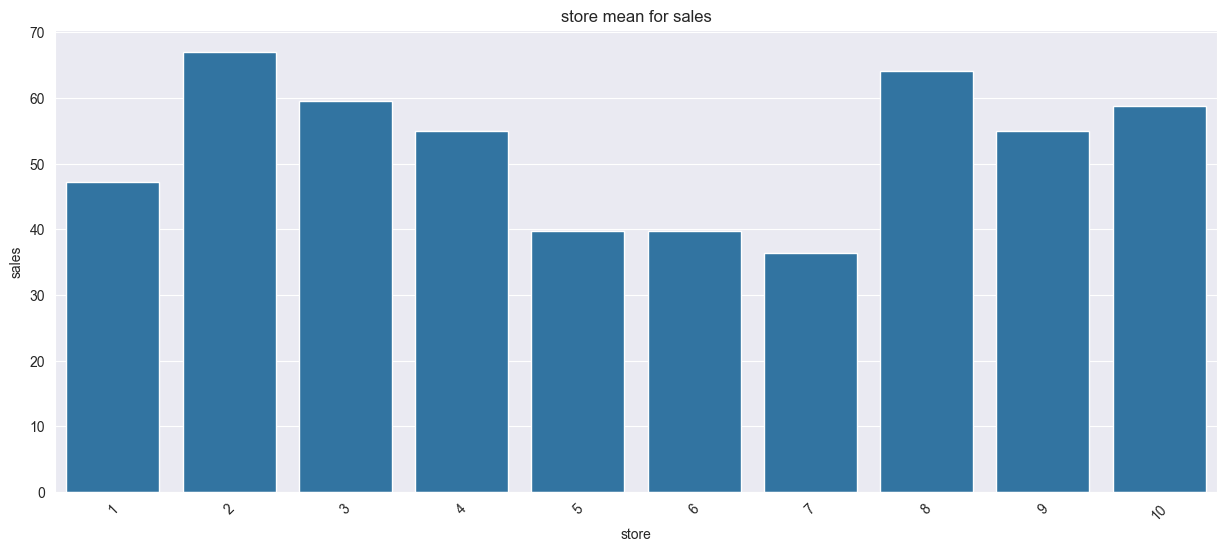

In [27]:
bivariate_Analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_Analyzer.analyze(data, 'store', 'sales')

## Sales by Item

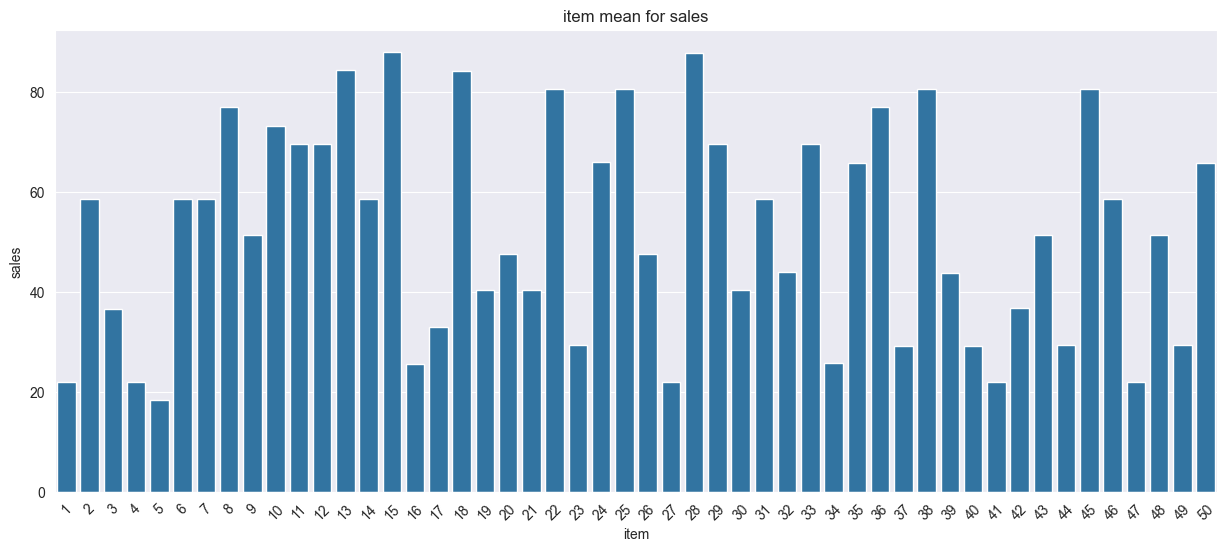

In [28]:
bivariate_Analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_Analyzer.analyze(data, 'item', 'sales')

# Sales by Store and Item

In [21]:
data.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                 sum       mean median        std
store item                                       
1     1      36468.0  19.971522   19.0   6.741022
      2      97050.0  53.148959   52.0  15.005779
      3      60638.0  33.208105   33.0  10.072529
      4      36440.0  19.956188   20.0   6.640618
      5      30335.0  16.612815   16.0   5.672102
...              ...        ...    ...        ...
10    46    120601.0  66.046550   65.0  18.114991
      47     45204.0  24.755750   24.0   7.924820
      48    105570.0  57.814896   57.0  15.898538
      49     60317.0  33.032311   32.0  10.091610
      50    135192.0  74.037240   73.0  19.937566

[500 rows x 4 columns]